
<h2><center> Quantitative Trading Strategies - Assignment 5 </center></h2>


<h3><span style="color:#00008B">Submitted by - Krishna Vardhan Diggavi </span></h3>

<h3><span style="color:#00008B">Email - krishnadiggavi@uchicago.edu</span></h3>

# Import functions

In [975]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
import os
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import zscore
pd.options.mode.chained_assignment = None 
import seaborn as sns
import pandas_market_calendars as mcal
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from scipy.stats import norm

import statsmodels.api as sm
plt.style.use('seaborn')

- In this assignment we are going to implement a trading strategy based on FX Carry strategy. Here is the brief info about the strategy. <br>

# FX Carry Strategy

### Description:<br>
- FX carry strategy is a type of investment strategy in which an investor borrows money in a low-interest-rate currency and invests it in a higher-interest-rate currency. <br><br>
- The investor earns a profit from the difference in interest rates between the two currencies, which is known as the "carry." <br> <br>
- FX carry strategy can be a profitable investment strategy when interest rates are relatively stable and the exchange rates between the two currencies remain stable. However, it is important to note that there is always a risk of currency fluctuations and market volatility, which can cause losses. Therefore, investors should carefully analyze the risks and potential rewards of the strategy before investing. <br><br>

### Advantages:<br>
- Income Generation: The primary advantage of the FX carry strategy is that it generates income for investors by exploiting differences in interest rates between currencies. The investor can earn a steady stream of income from the interest rate differential, which can be an attractive feature for investors seeking yield in a low interest rate environment.<br><br>

- Diversification: The FX carry strategy can provide diversification benefits to an investment portfolio by adding exposure to the foreign exchange market. This can be useful for investors seeking to reduce the overall risk of their portfolio by diversifying across different asset classes.<br><br>

- Low Volatility: The FX carry strategy can be a relatively low-volatility investment approach because it generates returns primarily from the carry trade rather than relying on price appreciation. This can be attractive to investors who prefer a less risky investment approach.<br><br>

- Liquidity: The foreign exchange market is one of the most liquid markets in the world, which means that it is easy for investors to enter and exit positions. This can be an advantage for investors who need to manage liquidity in their portfolio.<br><br>


### Risks involved in the strategy:<br>

- Currency Risk: One of the primary risks associated with the FX carry strategy is currency risk. Exchange rates between currencies can fluctuate significantly, which can erode or eliminate the profits generated from the interest rate differential. Investors who use the FX carry strategy should be prepared to accept the risk of potential losses due to currency movements.<br><br>

- Interest Rate Risk: Interest rate risk is another potential risk of the FX carry strategy. If interest rates in the higher-yielding currency decrease, it can result in a lower profit or even a loss for the investor. In addition, if interest rates in the lower-yielding currency increase, the cost of borrowing can also increase, which can reduce the potential profit.<br><br>

- Market Risk: The FX carry strategy is subject to general market risk and economic risk, which can impact the performance of the strategy. Market volatility and unpredictable events, such as geopolitical tensions, can cause fluctuations in exchange rates that can negatively impact the profitability of the strategy.<br><br>

- Liquidity Risk: While the foreign exchange market is one of the most liquid markets in the world, some currencies may be less liquid than others. This can result in challenges in entering or exiting positions, especially during times of market stress..<br><br>




### Tackle the risk:<br>
- Diversification: One of the most effective ways to manage risks is to diversify across different currencies and asset classes. This can help to reduce the impact of currency movements and other market risks.<br><br>

- Risk Management: Investors can also employ various risk management techniques, such as stop-loss orders and position sizing, to manage the risks associated with the FX carry strategy. This can help to limit losses and reduce the impact of market volatility.<br><br>

- Monitoring: Investors should closely monitor the markets and news events that could potentially impact the currencies involved in the carry trade. By staying informed, investors can better manage their risks and make more informed investment decisions.<br><br>

- Choosing Currencies Carefully: It's important to choose currencies carefully, as some may be more volatile or less liquid than others. By selecting currencies with stable interest rates and lower volatility, investors may be able to reduce their risks.<br><br>

- Reducing Leverage: Finally, investors can also reduce leverage to limit the potential losses associated with the FX carry strategy. By using less leverage, investors can reduce the impact of market movements and limit their exposure to potential losses.<br><br>


# Preparing the Data

### Extracting the Yield Curves Data

In [976]:
GBR_ISSC = quandl.get('YC/GBR_ISSC', start_date='2009-01-01', 
                      returns="pandas",
                     api_key='nVwoRNxyU88t5sMKgzAt')
GBR_ISSS = quandl.get('YC/GBR_ISSS', start_date='2009-01-01', 
                      returns="pandas",
                     api_key='nVwoRNxyU88t5sMKgzAt')
VNM = quandl.get('YC/VNM', start_date='2009-01-01', 
                      returns="pandas",
                     api_key='nVwoRNxyU88t5sMKgzAt')
GBP = quandl.get('YC/GBR', start_date='2009-01-01', 
                      returns="pandas",
                     api_key='nVwoRNxyU88t5sMKgzAt')
THA = quandl.get('YC/THA', start_date='2009-01-01', 
                      returns="pandas",
                     api_key='nVwoRNxyU88t5sMKgzAt')
PAK = quandl.get('YC/PAK', start_date='2009-01-01', 
                      returns="pandas",
                     api_key='nVwoRNxyU88t5sMKgzAt')
PHL = quandl.get('YC/PHL', start_date='2009-01-01', 
                      returns="pandas",
                     api_key='nVwoRNxyU88t5sMKgzAt')

# Extracting the FX rates Data

In [977]:
VNDUSD = quandl.get('CUR/VND', start_date='2009-01-01', 
                      returns="pandas",
                     api_key='nVwoRNxyU88t5sMKgzAt')
THBUSD = quandl.get('CUR/THB', start_date='2009-01-01', 
                      returns="pandas",
                     api_key='nVwoRNxyU88t5sMKgzAt')
PKRUSD = quandl.get('CUR/PKR', start_date='2009-01-01', 
                      returns="pandas",
                     api_key='nVwoRNxyU88t5sMKgzAt')
PHPUSD = quandl.get('CUR/PHP', start_date='2009-01-01', 
                      returns="pandas",
                     api_key='nVwoRNxyU88t5sMKgzAt')
GBPUSD = quandl.get('CUR/GBP', start_date='2009-01-01', 
                      returns="pandas",
                     api_key='nVwoRNxyU88t5sMKgzAt')

# Interpolating and Resampling to weekly data

In [978]:
VNDUSD = VNDUSD.resample('W-WED').asfreq()
THBUSD = THBUSD.resample('W-WED').asfreq()
PKRUSD = PKRUSD.resample('W-WED').asfreq()
PHPUSD = PHPUSD.resample('W-WED').asfreq()
GBPUSD = GBPUSD.resample('W-WED').asfreq()

In [979]:
VNM = VNM.interpolate().resample('W-WED').asfreq().fillna(method='ffill')/100
THA = THA.interpolate().resample('W-WED').asfreq().fillna(method='ffill')/100
PAK = PAK.interpolate().resample('W-WED').asfreq().fillna(method='ffill')/100
PHL = PHL.interpolate().resample('W-WED').asfreq().fillna(method='ffill')/100
GBR_ISSC = GBR_ISSC.interpolate().resample('W-WED').asfreq().fillna(method='ffill')/100
GBR_ISSS = GBR_ISSS.interpolate().resample('W-WED').asfreq().fillna(method='ffill')/100



### GBP OIS data

- We are combing the GBR_ISSC and GBR_ISSS data to get the GBP OIS data.<br>
- Simlar to above we are interpolating data and resampling to weekly data. <br>
- We are removing duplicate values so as to avoid index issue during strategy implementation. <br>

In [980]:
GBP_OIS = pd.concat([GBR_ISSC, GBR_ISSS])
GBP_OIS = GBP_OIS[['0.08Y']]
GBP_OIS = GBP_OIS[~GBP_OIS.index.duplicated(keep='first')]

In [981]:
GBP = GBP.interpolate().resample('W-WED').asfreq().fillna(method='ffill')/100
GBP = GBP[['5-Year']]
GBP = GBP.rename(columns={"5-Year": 5})


In [1069]:
GBP_filtered =GBP[GBP.index > '2014-12-01']

### Plotting the Yield Curves

<AxesSubplot:xlabel='Date'>

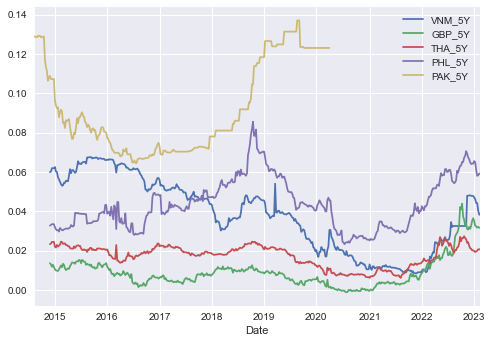

In [1070]:
yieldcurves = pd.concat([VNM[5],GBP_filtered[5],THA[5],PHL[5],PAK[5.00]],axis =1)
yieldcurves.columns = ['VNM_5Y', 'GBP_5Y','THA_5Y','PHL_5Y','PAK_5Y']
yieldcurves.plot()

### Observation:
1. From the above graph it can be observed that GBP-5Y have the lowest interest compared to the other emerging market currencies.
2. Thus we borrow in GBP currency and lend in other currencies. 

### Computing the Zero Coupon Bond 

In [982]:
def compute_zcb_curve(spot_rates_curve):
    zcb_rates = spot_rates_curve.copy()
    for curve in spot_rates_curve.columns:
        spot = spot_rates_curve[curve]
        for tenor, spot_rate in spot.iteritems():
            if tenor>0.001:
                times = np.arange(tenor-0.25, 0, step=-0.25)[::-1]
                coupon_half_yr = 0.25*spot_rate
                z = np.interp(times, zcb_rates[curve].index.values, zcb_rates[curve].values) # Linear interpolation
                preceding_coupons_val = (coupon_half_yr*np.exp(-z*times)).sum()
                zcb_rates[curve][tenor] = -np.log((1-preceding_coupons_val)/(1+coupon_half_yr))/tenor
    return zcb_rates


### Renaming the column names

In [983]:
def convert_spot_curve_to_zcb(yield_curve):
    if '2-Year' in yield_curve.columns:
        spot_curve_curr = yield_curve[['1-Year','2-Year','3-Year','5-Year']]
        spot_curve_curr = spot_curve_curr.rename(columns={'1-Year':1, '2-Year':2, '3-Year':3,'5-Year':5 })
        years_check = [1,2,3,5]
    else:
        spot_curve_curr = yield_curve[['3-Month','6-Month','1-Year','3-Year','5-Year']]
        spot_curve_curr = spot_curve_curr.rename(columns={'3-Month':0.25,'6-Month':0.5,'1-Year':1,'3-Year':3,'5-Year':5 })
        years_check = [0.25,0.5,1,3,5]
   
    zcb_curr =  []
    for i in years_check:
        zcb_curr.append(compute_zcb_curve(spot_curve_curr[[i]].T))
   
    zcb_df = pd.concat(zcb_curr)
    return zcb_df



In [990]:
def convert_spot_curve(yield_curve):
    if '2-Year' in yield_curve.columns:
        spot_curve_curr = yield_curve[['1-Year','2-Year','3-Year','5-Year']]
        spot_curve_curr = spot_curve_curr.rename(columns={'1-Year':1, '2-Year':2, '3-Year':3,'5-Year':5 })
        years_check = [1,2,3,5]
    else:
        spot_curve_curr = yield_curve[['3-Month','6-Month','1-Year','3-Year','5-Year']]
        spot_curve_curr = spot_curve_curr.rename(columns={'3-Month':0.25,'6-Month':0.5,'1-Year':1,'3-Year':3,'5-Year':5 })
        years_check = [0.25,0.5,1,3,5]
    return spot_curve_curr

In [991]:
VNM = convert_spot_curve(VNM)
THA = convert_spot_curve(THA)
PAK = convert_spot_curve(PAK)
PHL = convert_spot_curve(PHL)

In [984]:
zcb_VNM = convert_spot_curve_to_zcb(VNM)
zcb_VNM = zcb_VNM.T
PAK.rename(columns={'12-Month':'1-Year'}, inplace=True)
zcb_pak = convert_spot_curve_to_zcb(PAK)
zcb_pak = zcb_pak.T
zcb_tha = convert_spot_curve_to_zcb(THA)
zcb_tha = zcb_tha.T
zcb_phl = convert_spot_curve_to_zcb(PHL)
zcb_phl = zcb_phl.T

### Calculating the Bond Price

In [985]:
def bond_price_2(zcb, coupon_rate, tenor):
    times = np.arange(tenor, 0, step=-0.25)[::-1]
    if times.shape[0]==0:
        p = 1.0
    else:
        r = np.interp(times, zcb.index.values, zcb.values) # Linear interpolation
        p = np.exp(-tenor*r[-1]) + 0.25 * coupon_rate * np.exp(-r*times).sum()
    return p



We are calculating the bond entry price here by taking tenor as 5 Year

In [986]:
def bond_price_dataframe(df, df1):
    bond_prices = []
    for i in range(len(df)):
        coupon_rate = df1['5-Year'].iloc[i]
        new_df = df1[['5-Year']]
        tenor = 5
        bond_price = bond_price_2(df.iloc[i], coupon_rate, tenor)
        bond_prices.append(bond_price)
    bond_prices_df = pd.DataFrame(np.array(bond_prices).reshape(len(df), len(new_df.columns)), 
                          index=df.index, 
                          columns=new_df.columns)
    return bond_prices_df

In [987]:
zcb_vnm_p = bond_price_dataframe(zcb_VNM, VNM)
zcb_pak_p = bond_price_dataframe(zcb_pak, PAK)
zcb_tha_p = bond_price_dataframe(zcb_tha, THA)
zcb_phl_p = bond_price_dataframe(zcb_phl, PHL)

We are calculating the bond exit price here by taking tenor as 5-1/52 Year

In [988]:
def bond_exit_dataframe(df, df1):
    bond_prices = []
    for i in range(len(df)):
        coupon_rate = df1['5-Year'].iloc[i]
        new_df = df1[['5-Year']]
        tenor = 5 -(1/52)
        bond_price = bond_price_2(df.iloc[i], coupon_rate, tenor)
        bond_prices.append(bond_price)
    bond_prices_df = pd.DataFrame(np.array(bond_prices).reshape(len(df), len(new_df.columns)), 
                          index=df.index, 
                          columns=new_df.columns)
    return bond_prices_df

In [989]:
zcb_vnm_e = bond_exit_dataframe(zcb_VNM, VNM)
zcb_pak_e = bond_exit_dataframe(zcb_pak, PAK)
zcb_tha_e = bond_exit_dataframe(zcb_tha, THA)
zcb_phl_e = bond_exit_dataframe(zcb_phl, PHL)

# Implementing the FX Carry Strategy

### Procedure:
- Signal: We define a signal of 1 if   5Y swap rate for the lending currency is greater than 5Y swap rate + 50 bp else 0.<br><br>
- Entering the borrowing position: In the borrowing (funding) currency, assume a rate of OIS+50bp, paid on 4/5 the notional amount (5x leverage) in the borrowing currency for each active position.<br><br>
- Exiting the borrowing Position: we need to tally accrued interest at the borrow and lend rates, and then compute mark-to-market for the swap exit.<br><br>
- Entering the lending position: We enter the lending position by buying the lending currency bonds with the total notional.<br><br>
- Exiting the lending Position: We shift the lending position and multiply by ratio of bond exit to bond entry price which we have calculated separately above and divide by lending exchang rate. <br><br>



### Aligning the data indices:
- Here since all of the data we extracted are in different date ranges so the important step is to align all the dataframes to common index which is lending currency index in this case. For this, I am trying to fond common index and trying to align all of them to same.<br><br>

In [992]:
def strategy_implementation(ccy_lending,ccy_borrowing,fx_rate_lending,fx_rate_borrowing,rate_lending,rate_borrowing, bond_entry_price, bond_exit_price):

    leverage = 0.8
    notional = 10000000   
    entertenor = 5
    
    common_index = ccy_borrowing.index.intersection(ccy_lending.index)
    ccy_borrowing = ccy_borrowing.loc[common_index]
    ccy_lending = ccy_lending.loc[common_index]
    fx_rate_borrowing = fx_rate_borrowing.loc[common_index] 
    fx_rate_lending = fx_rate_lending.loc[common_index] 
    rate_lending = rate_lending.loc[common_index]
    rate_borrowing = rate_borrowing.loc[common_index]  

    df = pd.DataFrame(index = ccy_lending.index)
    
    df['signal'] = np.where(rate_lending[entertenor]>rate_borrowing[entertenor]+0.005,1,0)

    df['borrowing_entry_positions'] = df.signal*leverage*notional*fx_rate_borrowing.RATE
    df['borrowing_exit_positions'] = df['borrowing_entry_positions'].shift(1) / fx_rate_borrowing.RATE * np.exp((ccy_borrowing.shift(1).iloc[:,0] + 0.005) * (1/52)) + df.signal.shift(1)*notional*(1-leverage)
    df.loc[df.index[0], 'borrowing_exit_positions'] = 0
    
    df['Interest rate'] = np.exp((GBP_OIS.iloc[:,0] + 0.005) * (1/52))

    df['Bond_enter_price'] = bond_entry_price['5-Year']
    df['Bond_exit_price'] = bond_exit_price['5-Year']
    
    df['lending_entry_positions'] = df.signal*notional*fx_rate_lending.RATE
    df['lending_exit_positions'] = (df.lending_entry_positions.shift(1).fillna(0)*(df['Bond_exit_price']/df['Bond_enter_price']))/fx_rate_lending.RATE
        
    df['pnl'] = df.lending_exit_positions - df.borrowing_exit_positions
    df['returns'] = df.pnl/((1-leverage)*notional)
    df['cumpnl'] = df.pnl.cumsum()
    df['cumreturns'] = df.returns.cumsum()
    df.fillna(0,inplace=True)

    return df


# Strategy Outputs

### Vietnamese Dong

In [993]:
VNM_final = strategy_implementation(zcb_VNM,GBP_OIS,VNDUSD,GBPUSD,VNM,GBP,zcb_vnm_p, zcb_vnm_e)
VNM_final.head()

,signal,borrowing_entry_positions,borrowing_exit_positions,Interest rate,Bond_enter_price,Bond_exit_price,lending_entry_positions,lending_exit_positions,pnl,returns,cumpnl,cumreturns
Date,,,,,,,,,,,,
2014-12-03,1,5102048.0,0.000000e+00,1.000178,1.004465,1.005905,2.136517e+11,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2014-12-10,1,5090760.0,1.001917e+07,1.000178,1.004284,1.005720,2.134960e+11,1.002160e+07,2432.676996,0.001216,2432.676996,0.001216
2014-12-17,1,5137136.0,9.929191e+06,1.000178,1.004321,1.005772,2.138287e+11,9.998876e+06,69685.101932,0.034843,72117.778928,0.036059
2014-12-24,1,5143160.0,9.992052e+06,1.000178,1.004321,1.005772,2.139463e+11,1.000895e+07,16896.918682,0.008448,89014.697610,0.044507
2014-12-31,1,5134928.0,1.001425e+07,1.000178,1.004321,1.005772,2.139480e+11,1.001438e+07,123.844872,0.000062,89138.542482,0.044569


### Pakistani Rupee 

In [994]:
PAK_final = strategy_implementation(zcb_pak,GBP_OIS,PKRUSD,GBPUSD,PAK,GBP,zcb_pak_p, zcb_pak_e)
PAK_final.head()

,signal,borrowing_entry_positions,borrowing_exit_positions,Interest rate,Bond_enter_price,Bond_exit_price,lending_entry_positions,lending_exit_positions,pnl,returns,cumpnl,cumreturns
Date,,,,,,,,,,,,
2014-08-13,1,4759320.0,0.000000e+00,1.000178,1.010778,1.013315,9.900672e+08,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2014-08-20,1,4813936.0,9.910643e+06,1.000178,1.010778,1.013315,1.002939e+09,9.896435e+06,-14207.702773,-0.007104,-14207.702773,-0.007104
2014-08-27,1,4835672.0,9.965456e+06,1.000178,1.010695,1.013227,1.017882e+09,9.877877e+06,-87578.926740,-0.043789,-101786.629512,-0.050893
2014-09-03,1,4856960.0,9.966351e+06,1.000178,1.010546,1.013070,1.021748e+09,9.987047e+06,20696.032003,0.010348,-81090.597509,-0.040545
2014-09-10,1,4967000.0,9.824162e+06,1.000178,1.010895,1.013438,1.018767e+09,1.005449e+07,230328.025899,0.115164,149237.428390,0.074619


### Thai Baht

In [995]:
THA_final = strategy_implementation(zcb_tha,GBP_OIS,THBUSD,GBPUSD,THA,GBP,zcb_tha_p, zcb_tha_e)
THA_final.head()

,signal,borrowing_entry_positions,borrowing_exit_positions,Interest rate,Bond_enter_price,Bond_exit_price,lending_entry_positions,lending_exit_positions,pnl,returns,cumpnl,cumreturns
Date,,,,,,,,,,,,
2014-12-03,1,5102048.0,0.000000e+00,1.000178,1.000476,1.001025,328565800.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2014-12-10,1,5090760.0,1.001917e+07,1.000178,1.000535,1.001101,328296100.0,1.001388e+07,-5292.093737,-0.002646,-5292.093737,-0.002646
2014-12-17,1,5137136.0,9.929191e+06,1.000178,1.000484,1.001018,329540200.0,9.967571e+06,38379.189302,0.019190,33087.095566,0.016544
2014-12-24,1,5143160.0,9.992052e+06,1.000178,1.000484,1.001018,328855200.0,1.002618e+07,34132.400739,0.017066,67219.496304,0.033610
2014-12-31,1,5134928.0,1.001425e+07,1.000178,1.000484,1.001018,328990800.0,1.000122e+07,-13035.296489,-0.006518,54184.199815,0.027092


### Philippine Peso 

In [996]:
PHL_final = strategy_implementation(zcb_phl,GBP_OIS,PHPUSD,GBPUSD,PHL,GBP,zcb_phl_p, zcb_phl_e)
PHL_final.head()

,signal,borrowing_entry_positions,borrowing_exit_positions,Interest rate,Bond_enter_price,Bond_exit_price,lending_entry_positions,lending_exit_positions,pnl,returns,cumpnl,cumreturns
Date,,,,,,,,,,,,
2014-12-03,1,5102048.0,0.000000e+00,1.000178,1.001562,1.002358,446971700.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2014-12-10,1,5090760.0,1.001917e+07,1.000178,1.001511,1.002296,445912500.0,1.003161e+07,12436.348016,0.006218,12436.348016,0.006218
2014-12-17,1,5137136.0,9.929191e+06,1.000178,1.001481,1.002261,447632900.0,9.969326e+06,40134.236171,0.020067,52570.584187,0.026285
2014-12-24,1,5143160.0,9.992052e+06,1.000178,1.001481,1.002261,446732900.0,1.002795e+07,35898.878365,0.017949,88469.462552,0.044235
2014-12-31,1,5134928.0,1.001425e+07,1.000178,1.001481,1.002261,447704300.0,9.986075e+06,-28180.168814,-0.014090,60289.293738,0.030145


# Analysing the Results obtained 

### Plot function 

In [997]:
def plot_strategy_analysis(df_final, currency_title, rate_lending, rate_borrowing):
    
    fig, ax = plt.subplots(4, 2, figsize=(20, 35))

    df_pnl = df_final['pnl'].fillna(0)
    mean_pnl = df_pnl.mean()
    vol_pnl = df_pnl.std()
    median_pnl = np.median(df_pnl)
    
    df_cumpnl = df_final['cumpnl'].fillna(0)
    mean_cumpnl = df_cumpnl.mean()
    vol_cumpnl = df_cumpnl.std()
    median_cumpnl = np.median(df_cumpnl)
    
    df_returns = df_final['returns'].fillna(0)
    mean_ret= df_returns.mean()
    vol_ret = df_returns.std()
    median_ret = np.median(df_returns)
   
    df_cumret = df_final['cumreturns'].fillna(0)
    mean_cumret = df_cumret.mean()
    vol_cumret = df_cumret.std()
    median_cumret = np.median(df_cumret)

    
# Plot 1 - PNL Plot
    ax[0][0].plot(df_pnl)
    ax[0][0].axhline(mean_pnl, c='r', label='Mean')
    ax[0][0].axhline(mean_pnl+vol_pnl, c='b', label='Mean + Volatility')
    ax[0][0].axhline(mean_pnl-vol_pnl, c='g', label='Mean - Volatility')
    ax[0][0].set_title('{} PNL'.format(currency_title), size=15)
    ax[0][0].set_xlabel('Date', size=12)
    ax[0][0].set_ylabel('PNL', size=12)
    textstr = '\n'.join((r'$\mu=%.4f$' % (mean_pnl*100, ),r'$\mathrm{median}=%.4f$' % (median_pnl*100, ),r'$\sigma=%.4f$' % (vol_pnl*100, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[0][0].text(0.05, 0.95, textstr, transform=ax[0][0].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax[0][0].legend()
        
# Plot 2 - PNL Histogram
    ax[0][1].hist(df_pnl, bins=20, color='b', alpha=0.5)
    ax[0][1].axvline(mean_pnl, c='r', label='Mean')
    ax[0][1].axvline(mean_pnl+vol_pnl, c='g', label='Mean + Volatility')
    ax[0][1].axvline(mean_pnl-vol_pnl, c='y', label='Mean - Volatility')
    ax[0][1].set_title('{} PNL'.format(currency_title), size=15)
    ax[0][1].set_xlabel('PNL', size=12)
    ax[0][1].set_ylabel('Frequency', size=12)
    textstr = '\n'.join((r'$\mu=%.4f$' % (mean_pnl*100, ),r'$\mathrm{median}=%.4f$' % (median_pnl*100, ),r'$\sigma=%.4f$' % (vol_pnl*100, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[0][1].text(0.05, 0.95, textstr, transform=ax[0][1].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax[0][1].legend()
    
# Plot 3 - Cumulative PNL Plot
    ax[1][0].plot(df_cumpnl)
    ax[1][0].axhline(mean_cumpnl, c='r', label='Mean')
    ax[1][0].axhline(mean_cumpnl+vol_cumpnl, c='b', label='Mean + Volatility')
    ax[1][0].axhline(mean_cumpnl-vol_cumpnl, c='g', label='Mean - Volatility')
    ax[1][0].set_title('{} Cumulative PNL'.format(currency_title), size=15)
    ax[1][0].set_xlabel('Date', size=12)
    ax[1][0].set_ylabel('Cumulative PNL', size=12)
    textstr = '\n'.join((r'$\mu=%.4f$' % (mean_cumpnl*100, ),r'$\mathrm{median}=%.4f$' % (median_cumpnl*100, ),r'$\sigma=%.4f$' % (vol_cumpnl*100, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[1][0].text(0.05, 0.95, textstr, transform=ax[1][0].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax[1][0].legend()
        
# Plot 4 - Cumulative PNL Histogram
    ax[1][1].hist(df_cumpnl, bins=20, color='b', alpha=0.5)
    ax[1][1].axvline(mean_cumpnl, c='r', label='Mean')
    ax[1][1].axvline(mean_cumpnl+vol_cumpnl, c='g', label='Mean + Volatility')
    ax[1][1].axvline(mean_cumpnl-vol_cumpnl, c='y', label='Mean - Volatility')
    ax[1][1].set_title('{} Cumulative PNL'.format(currency_title), size=15)
    ax[1][1].set_xlabel('Cumulative PNL', size=12)
    ax[1][1].set_ylabel('Frequency', size=12)
    textstr = '\n'.join((r'$\mu=%.4f$' % (mean_cumpnl*100, ),r'$\mathrm{median}=%.4f$' % (median_cumpnl*100, ),r'$\sigma=%.4f$' % (vol_cumpnl*100, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[1][1].text(0.05, 0.95, textstr, transform=ax[1][1].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax[1][1].legend()
    

# Plot 5 - Returns Plot
    ax[2][0].plot(df_returns)
    ax[2][0].axhline(mean_ret, c='r', label='Mean')
    ax[2][0].axhline(mean_ret+vol_ret, c='b', label='Mean + Volatility')
    ax[2][0].axhline(mean_ret-vol_ret, c='g', label='Mean - Volatility')
    ax[2][0].set_title('{} Returns'.format(currency_title), size=15)
    ax[2][0].set_xlabel('Date', size=12)
    ax[2][0].set_ylabel('Returns', size=12)
    textstr = '\n'.join((r'$\mu=%.4f$' % (mean_ret*100, ),r'$\mathrm{median}=%.4f$' % (median_ret*100, ),r'$\sigma=%.4f$' % (vol_ret*100, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[2][0].text(0.05, 0.95, textstr, transform=ax[2][0].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax[2][0].legend()
        
# Plot 6 - Returns Histogram
    ax[2][1].hist(df_returns, bins=20, color='b', alpha=0.5)
    ax[2][1].axvline(mean_ret, c='r', label='Mean')
    ax[2][1].axvline(mean_ret+vol_ret, c='g', label='Mean + Volatility')
    ax[2][1].axvline(mean_ret-vol_ret, c='y', label='Mean - Volatility')
    ax[2][1].set_title('{} Returns'.format(currency_title), size=15)
    ax[2][1].set_xlabel('Returns', size=12)
    ax[2][1].set_ylabel('Frequency', size=12)
    textstr = '\n'.join((r'$\mu=%.4f$' % (mean_ret*100, ),r'$\mathrm{median}=%.4f$' % (median_ret*100, ),r'$\sigma=%.4f$' % (vol_ret*100, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[2][1].text(0.05, 0.95, textstr, transform=ax[2][1].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax[2][1].legend()
    
# Plot 7 - Cumulative Returns Plot
    ax[3][0].plot(df_cumret)
    ax[3][0].axhline(mean_cumret, c='r', label='Mean')
    ax[3][0].axhline(mean_cumret+vol_cumret, c='b', label='Mean + Volatility')
    ax[3][0].axhline(mean_cumret-vol_cumret, c='g', label='Mean - Volatility')
    ax[3][0].set_title('{} Cumulative Returns'.format(currency_title), size=15)
    ax[3][0].set_xlabel('Date', size=12)
    ax[3][0].set_ylabel('Cumulative Returns', size=12)
    textstr = '\n'.join((r'$\mu=%.4f$' % (mean_cumret*100, ),r'$\mathrm{median}=%.4f$' % (median_cumret*100, ),r'$\sigma=%.4f$' % (vol_cumret*100, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[3][0].text(0.05, 0.95, textstr, transform=ax[3][0].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax[3][0].legend()
        
# Plot 8 - Cumulative Returns Histogram
    ax[3][1].hist(df_cumret, bins=20, color='b', alpha=0.5)
    ax[3][1].axvline(mean_cumret, c='r', label='Mean')
    ax[3][1].axvline(mean_cumret+vol_cumret, c='g', label='Mean + Volatility')
    ax[3][1].axvline(mean_cumret-vol_cumret, c='y', label='Mean - Volatility')
    ax[3][1].set_title('{} Cumulative Returns'.format(currency_title), size=15)
    ax[3][1].set_xlabel('Cumulative Returns', size=12)
    ax[3][1].set_ylabel('Frequency', size=12)
    textstr = '\n'.join((r'$\mu=%.4f$' % (mean_cumret*100, ),r'$\mathrm{median}=%.4f$' % (median_cumret*100, ),r'$\sigma=%.4f$' % (vol_cumret*100, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[3][1].text(0.05, 0.95, textstr, transform=ax[3][1].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax[3][1].legend()
    
    fig.tight_layout()

### Performance Summary

In [1077]:
def performance_summary(return_data):

    summary_stats = return_data.mean().to_frame('Mean')*12
    summary_stats['Median'] = return_data.median()
    summary_stats['Volatility'] = return_data.std()*np.sqrt(12)
    summary_stats['Sharpe Ratio'] = summary_stats['Mean']/summary_stats['Volatility']
    
    summary_stats['Skewness'] = return_data.skew()
    summary_stats['Excess Kurtosis'] = return_data.kurtosis()
    summary_stats['VaR (0.05)'] = return_data.quantile(.05, axis = 0)
    summary_stats['CVaR (0.05)'] = return_data[return_data <= return_data.quantile(.05, axis = 0)].mean()
    summary_stats['1% quantile'] = return_data.quantile(.01, axis = 0)
    summary_stats['2% quantile'] = return_data.quantile(.02, axis = 0)
    summary_stats['10% quantile'] = return_data.quantile(.10, axis = 0)
    summary_stats['Min'] = return_data.min()
    summary_stats['Max'] = return_data.max()
    cum_returns = (1 + return_data).cumprod()
    rolling_max = cum_returns.cummax()
    drawdown = (cum_returns - rolling_max) / rolling_max
    summary_stats['max_drawdown'] = drawdown.min()
    
    return summary_stats.round(3)

### Vietnamese Dong

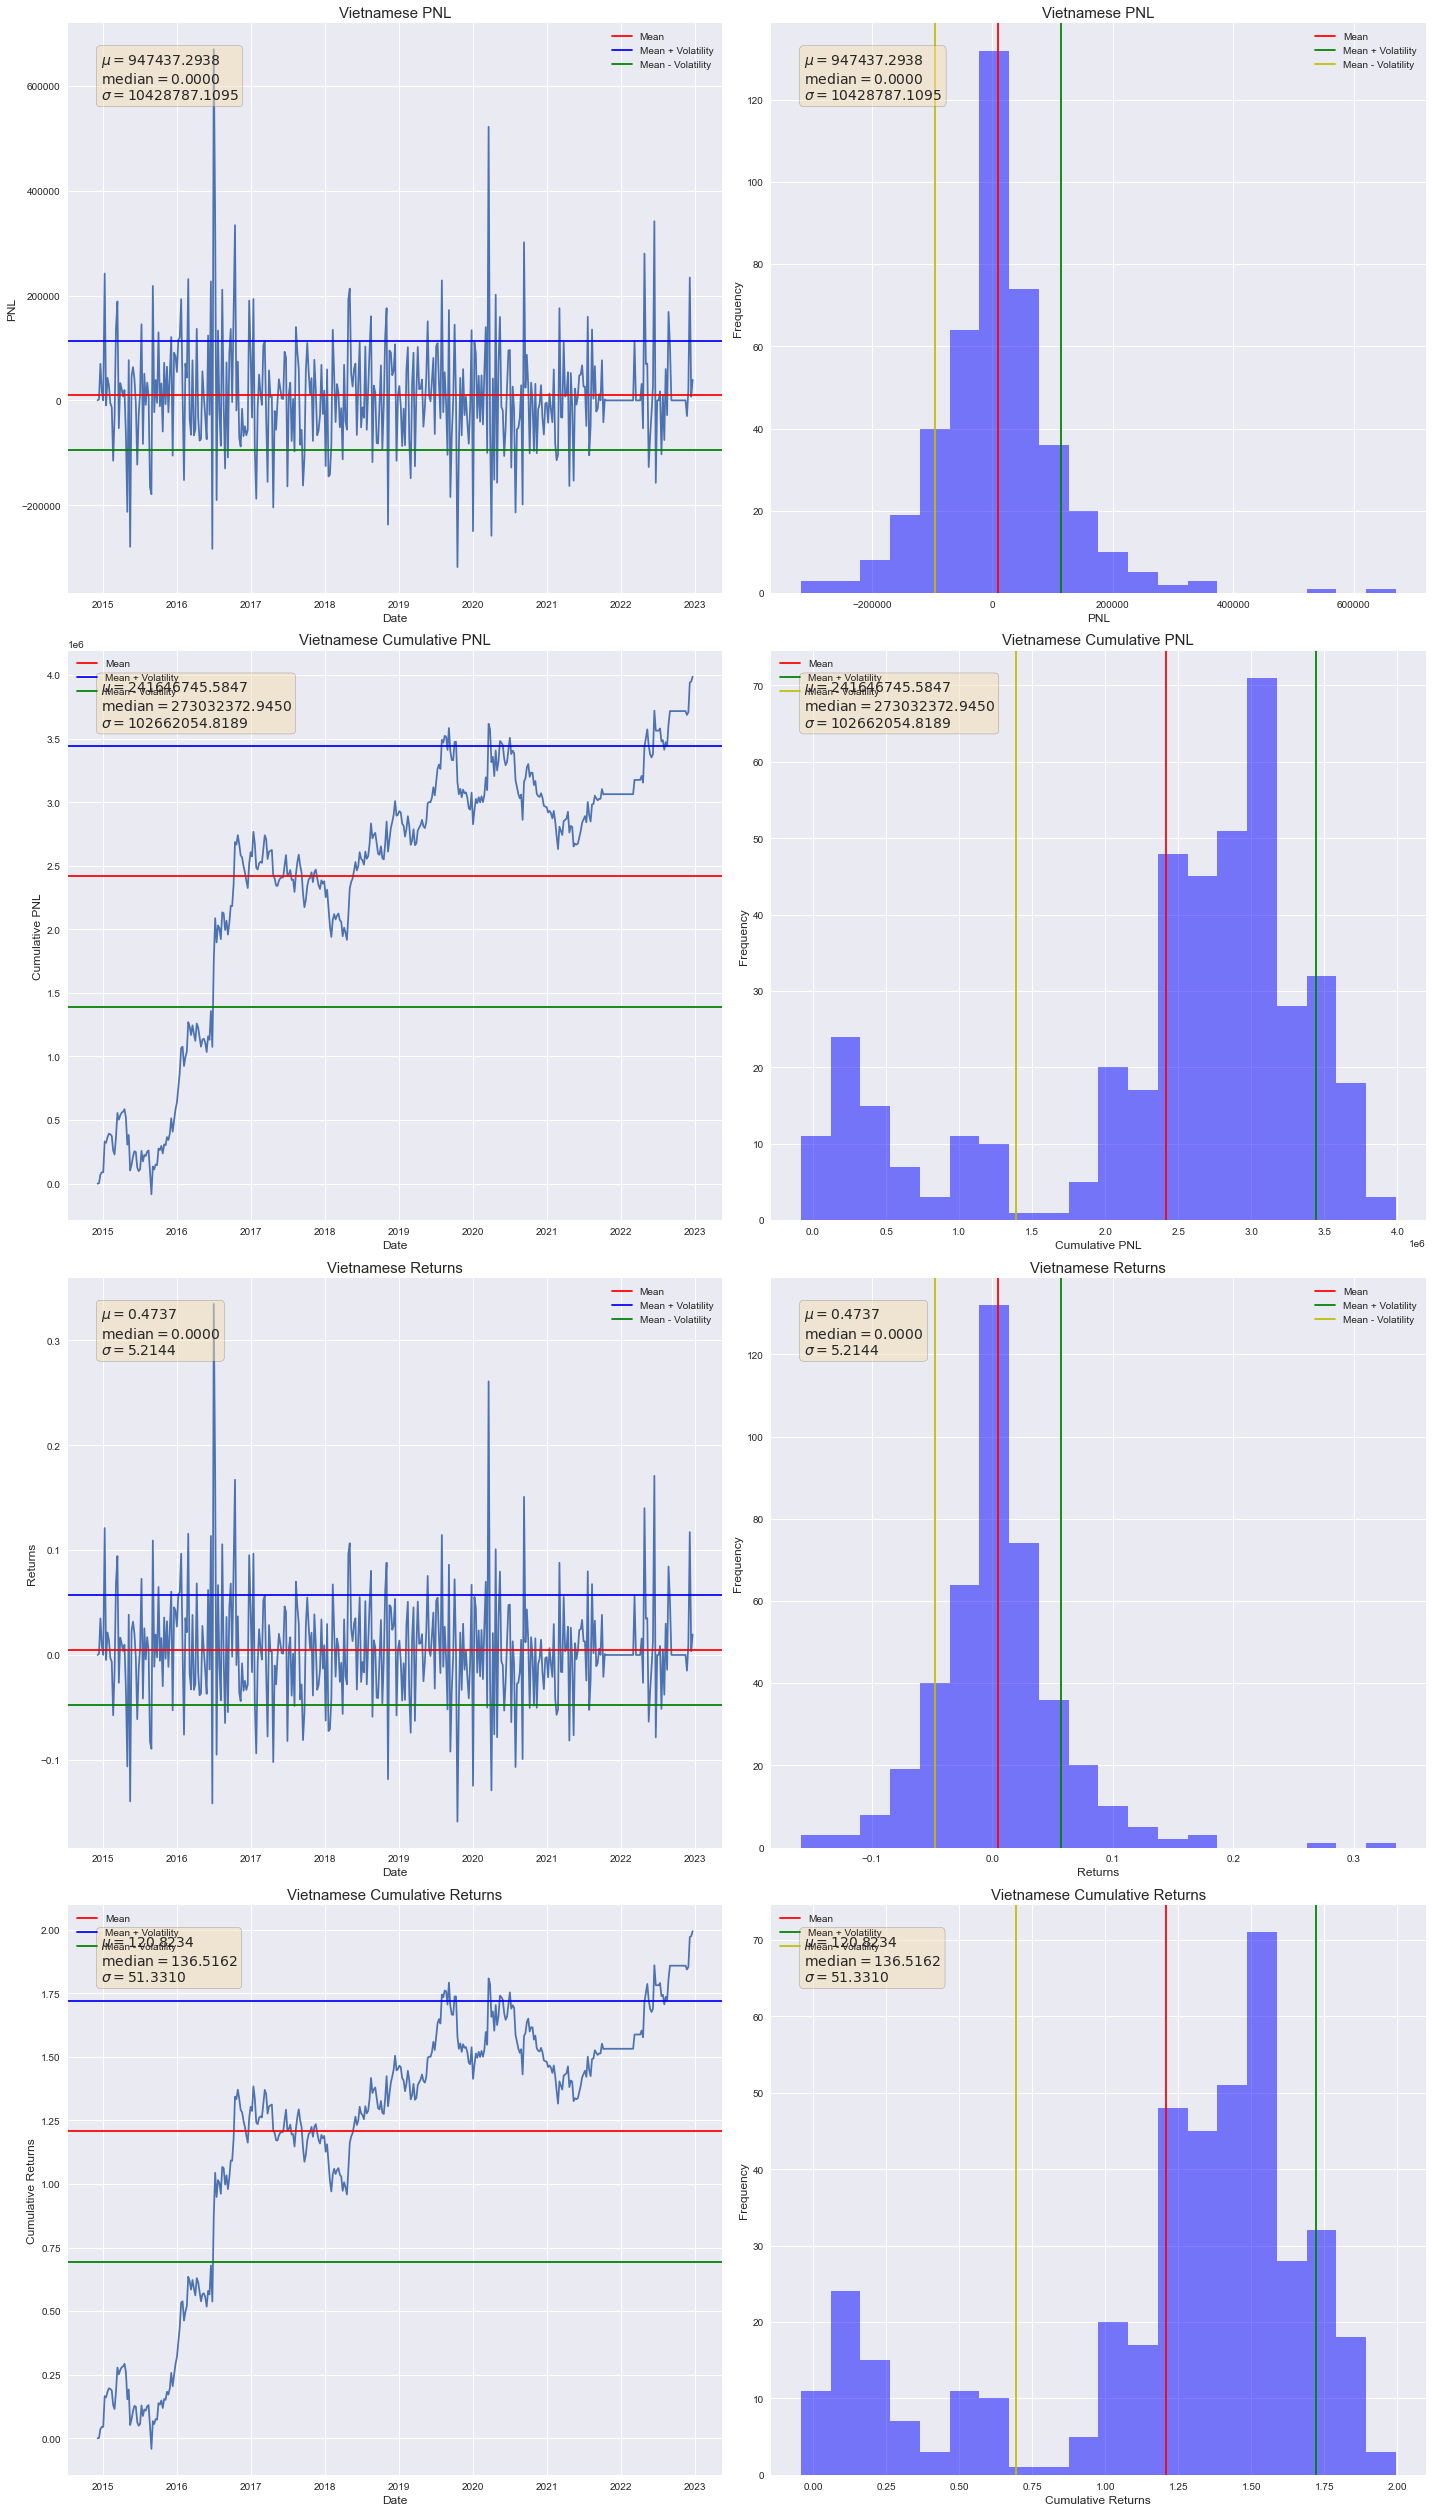

In [998]:
vnm_plot_1 = plot_strategy_analysis(VNM_final, 'Vietnamese', VNM, GBP)

In [1078]:
VNM_performance = performance_summary(VNM_final[['borrowing_entry_positions', 'borrowing_exit_positions', 'Bond_enter_price', 'Bond_exit_price', 'lending_entry_positions', 'lending_exit_positions', 'pnl', 'returns', 'cumpnl', 'cumreturns']])
VNM_performance

,Mean,Median,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),1% quantile,2% quantile,10% quantile,Min,Max,max_drawdown
borrowing_entry_positions,6.532690e+07,6.035848e+06,6.109179e+06,10.693,-2.606,5.349,0.000,0.000,0.000,0.000,5.102048e+06,0.000,6.765368e+06,0.000000e+00
borrowing_exit_positions,1.088605e+08,9.989255e+06,1.005931e+07,10.822,-2.814,5.960,0.000,0.000,0.000,0.000,9.671181e+06,0.000,1.035874e+07,0.000000e+00
Bond_enter_price,1.202100e+01,1.001000e+00,5.000000e-03,2192.112,1.015,-0.250,1.000,1.000,1.000,1.000,1.000000e+00,1.000,1.005000e+00,0.000000e+00
Bond_exit_price,1.203200e+01,1.002000e+00,7.000000e-03,1778.818,0.876,-0.438,1.000,1.000,1.000,1.000,1.001000e+00,1.000,1.007000e+00,0.000000e+00
lending_entry_positions,2.488461e+12,2.277143e+11,2.272693e+11,10.949,-2.837,6.152,0.000,0.000,0.000,0.000,2.134960e+11,0.000,2.484781e+11,0.000000e+00
lending_exit_positions,1.089742e+08,1.000797e+07,1.006437e+07,10.828,-2.819,5.979,0.000,0.000,0.000,0.000,9.902579e+06,0.000,1.033996e+07,0.000000e+00
pnl,1.136925e+05,0.000000e+00,3.612638e+05,0.315,0.952,5.446,-153090.443,-203321.861,-246996.882,-201997.182,-1.047779e+05,-317849.992,6.696846e+05,-1.247530e+39
returns,5.700000e-02,0.000000e+00,1.810000e-01,0.315,0.952,5.446,-0.077,-0.102,-0.123,-0.101,-5.200000e-02,-0.159,3.350000e-01,-4.600000e-01
cumpnl,2.899761e+07,2.730324e+06,3.556318e+06,8.154,-1.082,0.077,237253.211,122394.192,89039.467,106792.115,3.877864e+05,-84209.816,3.988711e+06,-inf
cumreturns,1.449900e+01,1.365000e+00,1.778000e+00,8.154,-1.082,0.077,0.119,0.061,0.045,0.053,1.940000e-01,-0.042,1.994000e+00,-4.200000e-02


#### Observations

1. Mean of cumulative returns is high around 14%.
2. Skewness of returns is positive which is desirable, means more returns compared to mean which can be inferrred from returns and cumulative returns graphs as well.
3. Positive excess kurtosis of returns says fatter tail compared to normal distribution, which can be observed from Return and cumulative Return distribution graph as well. 
In general, we can also infer this as having associated with greater risk of investing in Vietnameese Dong currency compared to that of stable GBP currency. If there is a significant change in prices, then things will go wrong and can get high losses. 
4. Maximum drawdown of cumulative returns is of almost -0.42 which means max loss we have inccured is about 4.2% wrt maximum value obtained.
5. Maximum gain occured around mid of 2016 and max loss around end of 2019. 
6. The tail of the histogram for returns and cumulative returns seems to be heavy bcz we are borrowing in low yielding currency GBP and investing in high yeilding currency Vietnameese Dong.  
7. Annualized Sharp ratio of cumulative returns is high around 8.1%



### Pakistani Rupee 

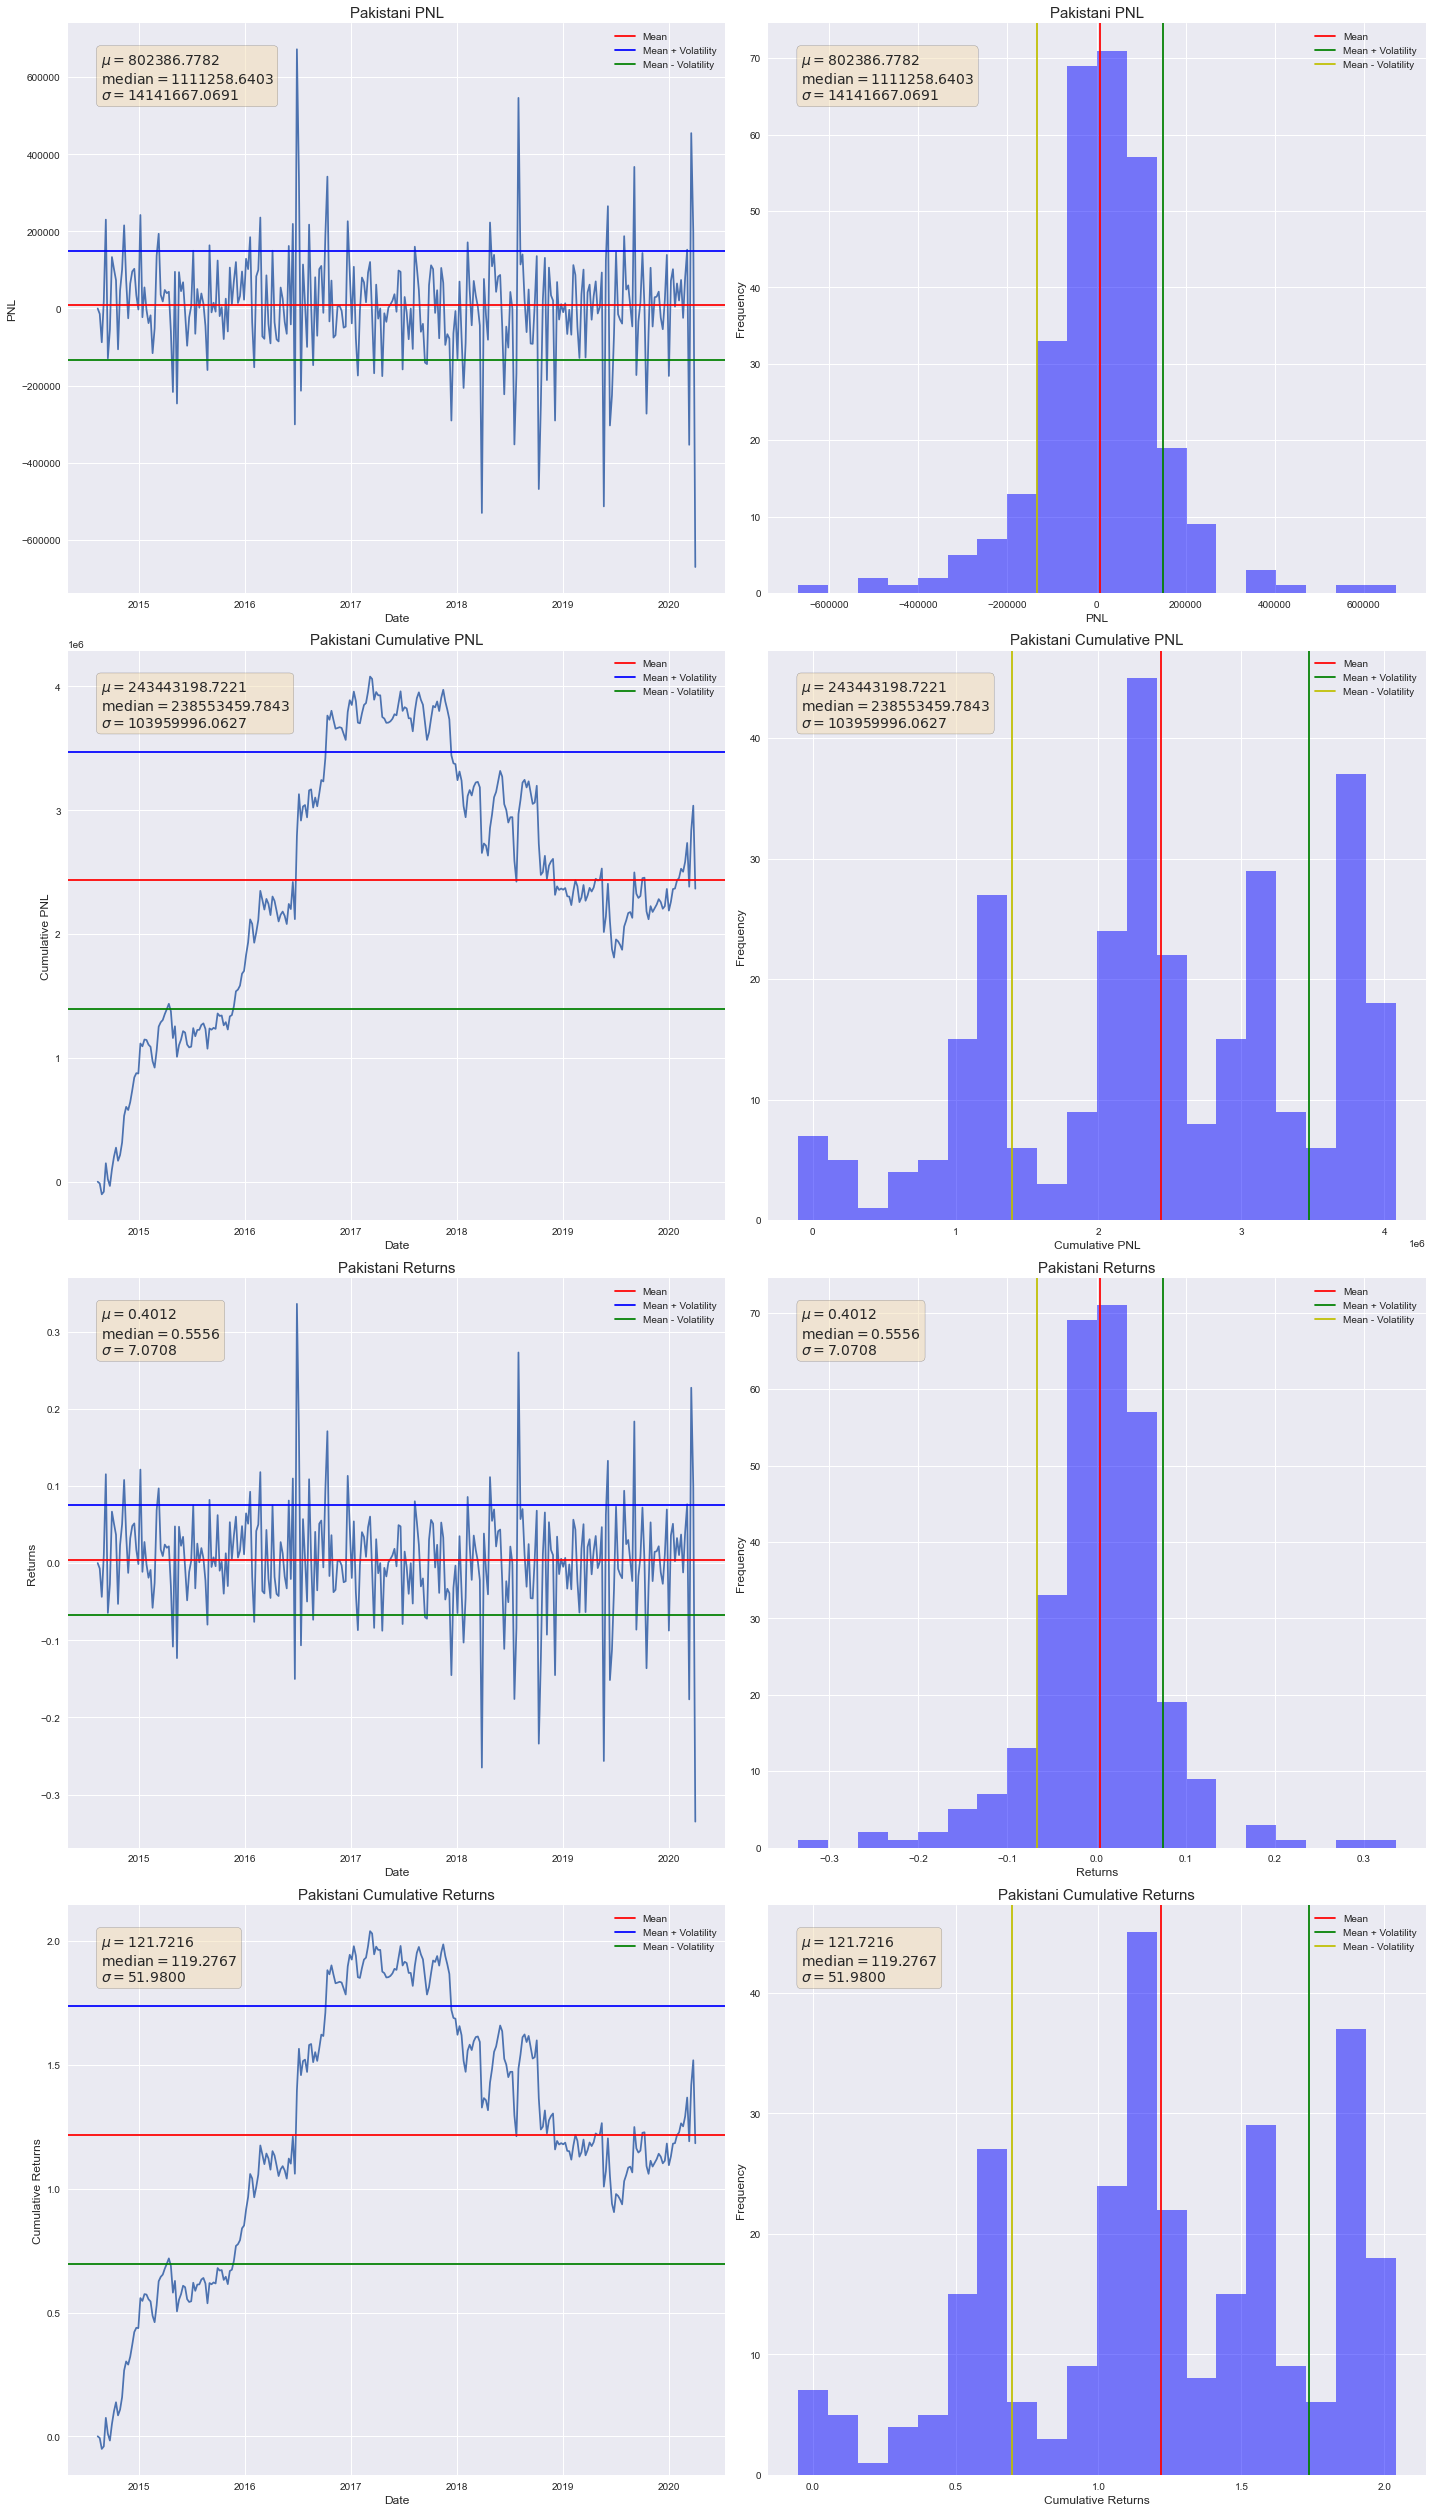

In [999]:
pak_plot_1 = plot_strategy_analysis(PAK_final, 'Pakistani', PAK, GBP)

In [1082]:
PAK_performance = performance_summary(PAK_final[['borrowing_entry_positions', 'borrowing_exit_positions', 'Bond_enter_price', 'Bond_exit_price', 'lending_entry_positions', 'lending_exit_positions', 'pnl', 'returns', 'cumpnl', 'cumreturns']])
PAK_performance

,Mean,Median,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),1% quantile,2% quantile,10% quantile,Min,Max,max_drawdown
borrowing_entry_positions,7.053670e+07,6.066280e+06,1.677245e+06,42.055,-0.508,-0.975,5.082132e+06,4.938863e+06,4.855683e+06,4.932361e+06,5.140971e+06,4.759320e+06,6.751208e+06,0.000000e+00
borrowing_exit_positions,1.195206e+08,9.993936e+06,2.051542e+06,58.259,-16.289,274.697,9.826540e+06,9.078826e+06,9.660124e+06,9.779436e+06,9.882920e+06,0.000000e+00,1.035874e+07,0.000000e+00
Bond_enter_price,1.205400e+01,1.005000e+00,1.100000e-02,1101.613,-0.434,0.624,9.980000e-01,9.980000e-01,9.980000e-01,9.980000e-01,9.990000e-01,9.970000e-01,1.011000e+00,0.000000e+00
Bond_exit_price,1.207700e+01,1.006000e+00,1.100000e-02,1069.805,-0.078,0.343,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.002000e+00,9.990000e-01,1.014000e+00,0.000000e+00
lending_entry_positions,1.412193e+10,1.049830e+09,6.949598e+08,20.320,1.075,-0.458,1.016307e+09,1.008155e+09,1.005870e+09,1.006881e+09,1.017998e+09,9.900672e+08,1.647993e+09,0.000000e+00
lending_exit_positions,1.196169e+08,1.001509e+07,2.042718e+06,58.558,-16.546,280.439,9.858606e+06,9.030047e+06,9.573798e+06,9.668232e+06,9.955154e+06,0.000000e+00,1.052447e+07,0.000000e+00
pnl,9.628641e+04,1.111259e+04,4.898817e+05,0.197,-0.327,5.038,-2.182747e+05,-3.526836e+05,-4.708126e+05,-3.091279e+05,-1.425497e+05,-6.702721e+05,6.720140e+05,-inf
returns,4.800000e-02,6.000000e-03,2.450000e-01,0.197,-0.327,5.038,-1.090000e-01,-1.760000e-01,-2.350000e-01,-1.550000e-01,-7.100000e-02,-3.350000e-01,3.360000e-01,-7.700000e-01
cumpnl,2.921318e+07,2.385535e+06,3.601280e+06,8.112,-0.376,-0.584,5.970481e+05,1.550591e+05,-1.541082e+04,8.965431e+04,1.097598e+06,-1.017866e+05,4.080058e+06,-2.441512e+14
cumreturns,1.460700e+01,1.193000e+00,1.801000e+00,8.112,-0.376,-0.584,2.990000e-01,7.800000e-02,-8.000000e-03,4.500000e-02,5.490000e-01,-5.100000e-02,2.040000e+00,-9.600000e-02


#### Observations

1. Mean of cumulative
returns is high around 14%.
2. Skewness of returns is negative which is not very desirable, means more returns which are lesser than the mean which can be inferrred from returns and cumulative returns graphs as well.
3. Positive excess kurtosis of returns says fatter tail compared to normal distribution, which can be observed from Return and cumulative Return distribution graph as well. 
In general, we can also infer this as having associated with greater risk of investing in Pakistani  currency compared to that of stable GBP currency. If there is a significant change in prices, then things will go wrong and can get high losses. 
4. Maximum drawdown of cumulative returns is of almost -0.96 which means max loss we have inccured is about 9.6% wrt maximum value obtained.
5. Maximum gain occured around mid of 2016 and max loss after start of 2020. 
5. The tail of the histogram for returns and cumulative returns seems to be heavy bcz we are borrowing in low yielding currency GBP and investing in high yeilding currency Pakistani.  
6. Annualized Sharp ratio of cumulative returns is high around 8.1



### Philippine Peso 

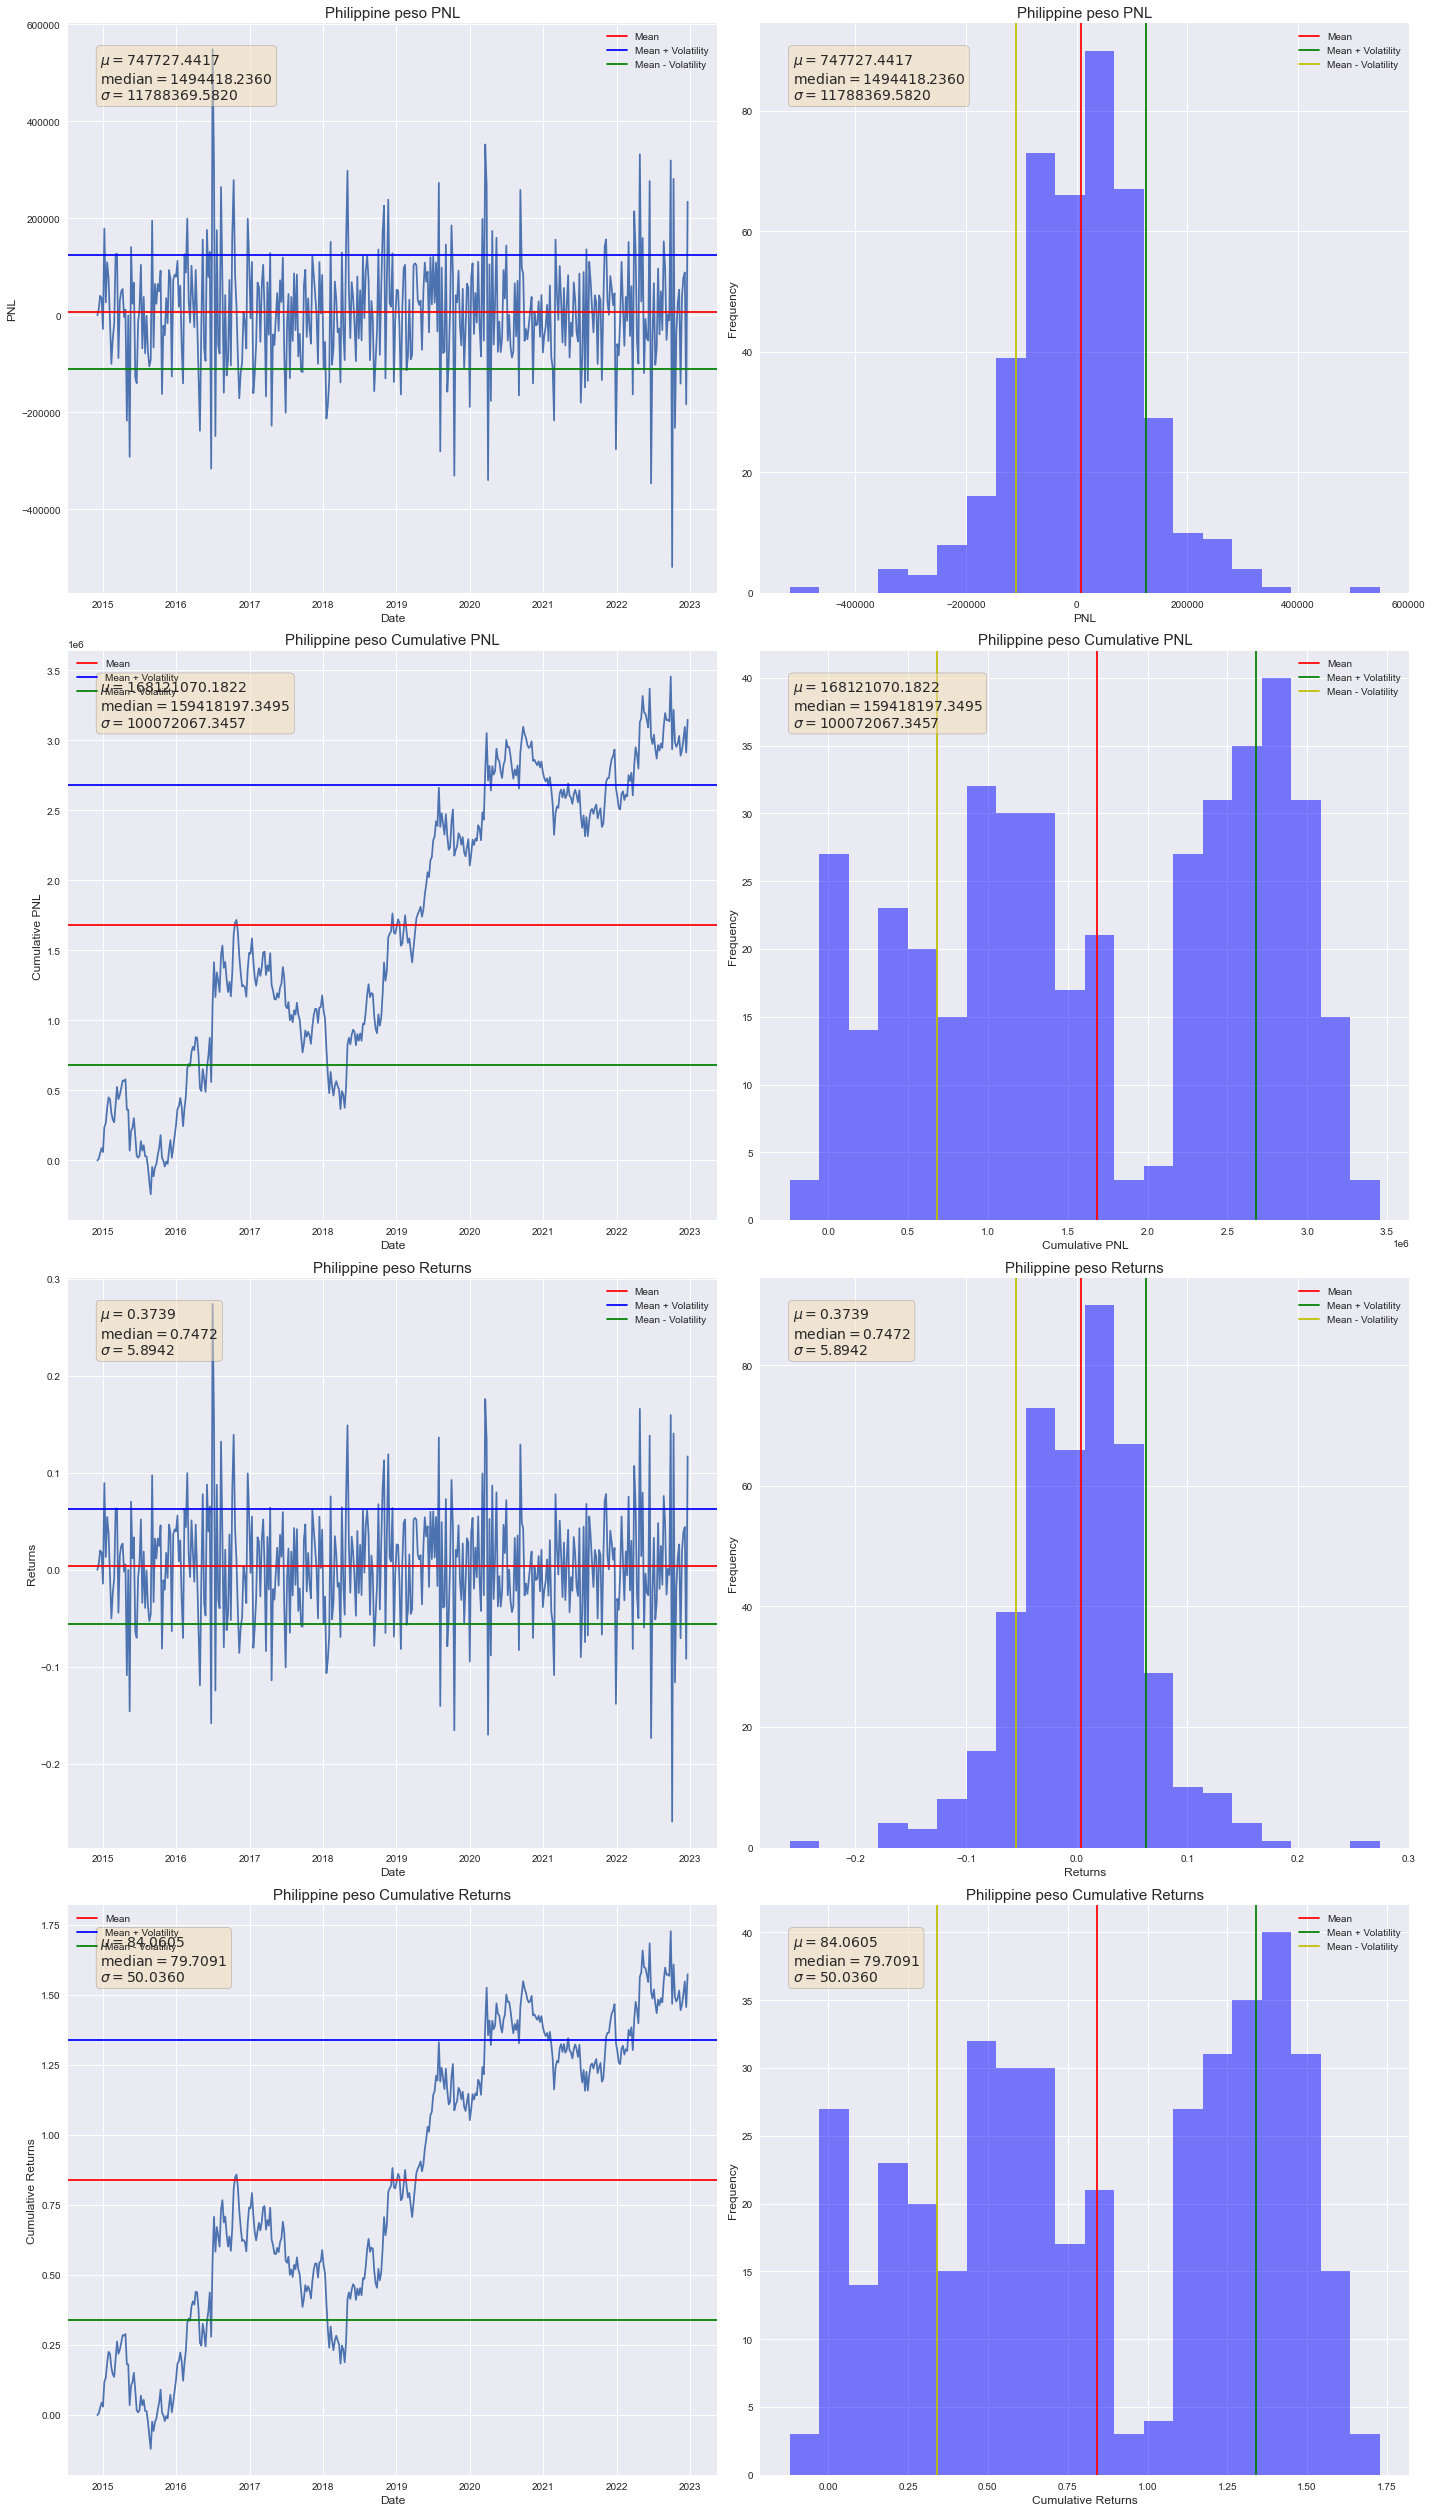

In [1000]:
phl_plot_1 = plot_strategy_analysis(PHL_final, 'Philippine peso', PHL, GBP)

In [1080]:
PHL_performance = performance_summary(PHL_final[['borrowing_entry_positions', 'borrowing_exit_positions', 'Bond_enter_price', 'Bond_exit_price', 'lending_entry_positions', 'lending_exit_positions', 'pnl', 'returns', 'cumpnl', 'cumreturns']])
PHL_performance

,Mean,Median,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),1% quantile,2% quantile,10% quantile,Min,Max,max_drawdown
borrowing_entry_positions,7.214526e+07,6.083832e+06,1.527914e+06,47.218,-0.192,-0.040,5.196216e+06,5.132374e+06,5.102818e+06,5.119546e+06,5.283232e+06,5.086080e+06,7.512448e+06,0.000000e+00
borrowing_exit_positions,1.196854e+08,1.000040e+07,1.733261e+06,69.052,-18.947,378.332,9.827559e+06,9.277918e+06,9.653058e+06,9.736750e+06,9.884554e+06,0.000000e+00,1.059369e+07,0.000000e+00
Bond_enter_price,1.202600e+01,1.002000e+00,6.000000e-03,1876.524,1.034,0.682,1.000000e+00,1.000000e+00,9.990000e-01,1.000000e+00,1.000000e+00,9.990000e-01,1.009000e+00,0.000000e+00
Bond_exit_price,1.203800e+01,1.003000e+00,7.000000e-03,1640.773,0.995,0.612,1.001000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.001000e+00,1.000000e+00,1.011000e+00,0.000000e+00
lending_entry_positions,6.011553e+09,5.036550e+08,1.044741e+08,57.541,0.236,0.256,4.474075e+08,4.444850e+08,4.418314e+08,4.442551e+08,4.622891e+08,4.407370e+08,5.904150e+08,0.000000e+00
lending_exit_positions,1.197751e+08,1.000885e+07,1.703750e+06,70.301,-19.994,406.650,9.889052e+06,9.396314e+06,9.813024e+06,9.838795e+06,9.925304e+06,0.000000e+00,1.019403e+07,0.000000e+00
pnl,8.972729e+04,1.494418e+04,4.083611e+05,0.220,-0.020,2.059,-1.709645e+05,-2.534778e+05,-3.110782e+05,-2.444042e+05,-1.295163e+05,-5.187356e+05,5.484031e+05,-7.419662e+33
returns,4.500000e-02,7.000000e-03,2.040000e-01,0.220,-0.020,2.059,-8.500000e-02,-1.270000e-01,-1.560000e-01,-1.220000e-01,-6.500000e-02,-2.590000e-01,2.740000e-01,-5.350000e-01
cumpnl,2.017453e+07,1.594182e+06,3.466598e+06,5.820,-0.121,-1.328,5.257058e+04,-2.060007e+04,-4.638002e+04,-1.709907e+04,2.905666e+05,-2.415746e+05,3.456242e+06,-inf
cumreturns,1.008700e+01,7.970000e-01,1.733000e+00,5.820,-0.121,-1.328,2.600000e-02,-1.000000e-02,-2.300000e-02,-9.000000e-03,1.450000e-01,-1.210000e-01,1.728000e+00,-2.940000e-01


#### Observations

1. Mean of cumulative returns is high around 10%.
2. Skewness of returns is negative which is not very desirable, means more returns which are lesser than the mean which can be inferrred from returns and cumulative returns graphs as well.
3. Positive excess kurtosis of returns says fatter tail compared to normal distribution, which can be observed from Return and cumulative Return distribution graph as well. 
In general, we can also infer this as having associated with greater risk of investing in Phillipine Peso currency compared to that of stable GBP currency. If there is a significant change in prices, then things will go wrong and can get high losses. 
4. Maximum drawdown of cumulative returns is of almost -0.29 which means max loss we have inccured is about 29% wrt maximum value obtained. 
5. Maximum gain occured around mid of 2016 and max loss around end of 2022. 
5. The tail of the histogram for returns and cumulative returns seems to be heavy bcz we are borrowing in low yielding currency GBP and investing in high yeilding currency Phillipine Peso.  
6. Annualized Sharp ratio of cumulative returns is around 5.8


### Thai Baht

C:\Users\Krishna Diggavi\AppData\Local\Temp\ipykernel_32128\1211647274.py:139: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


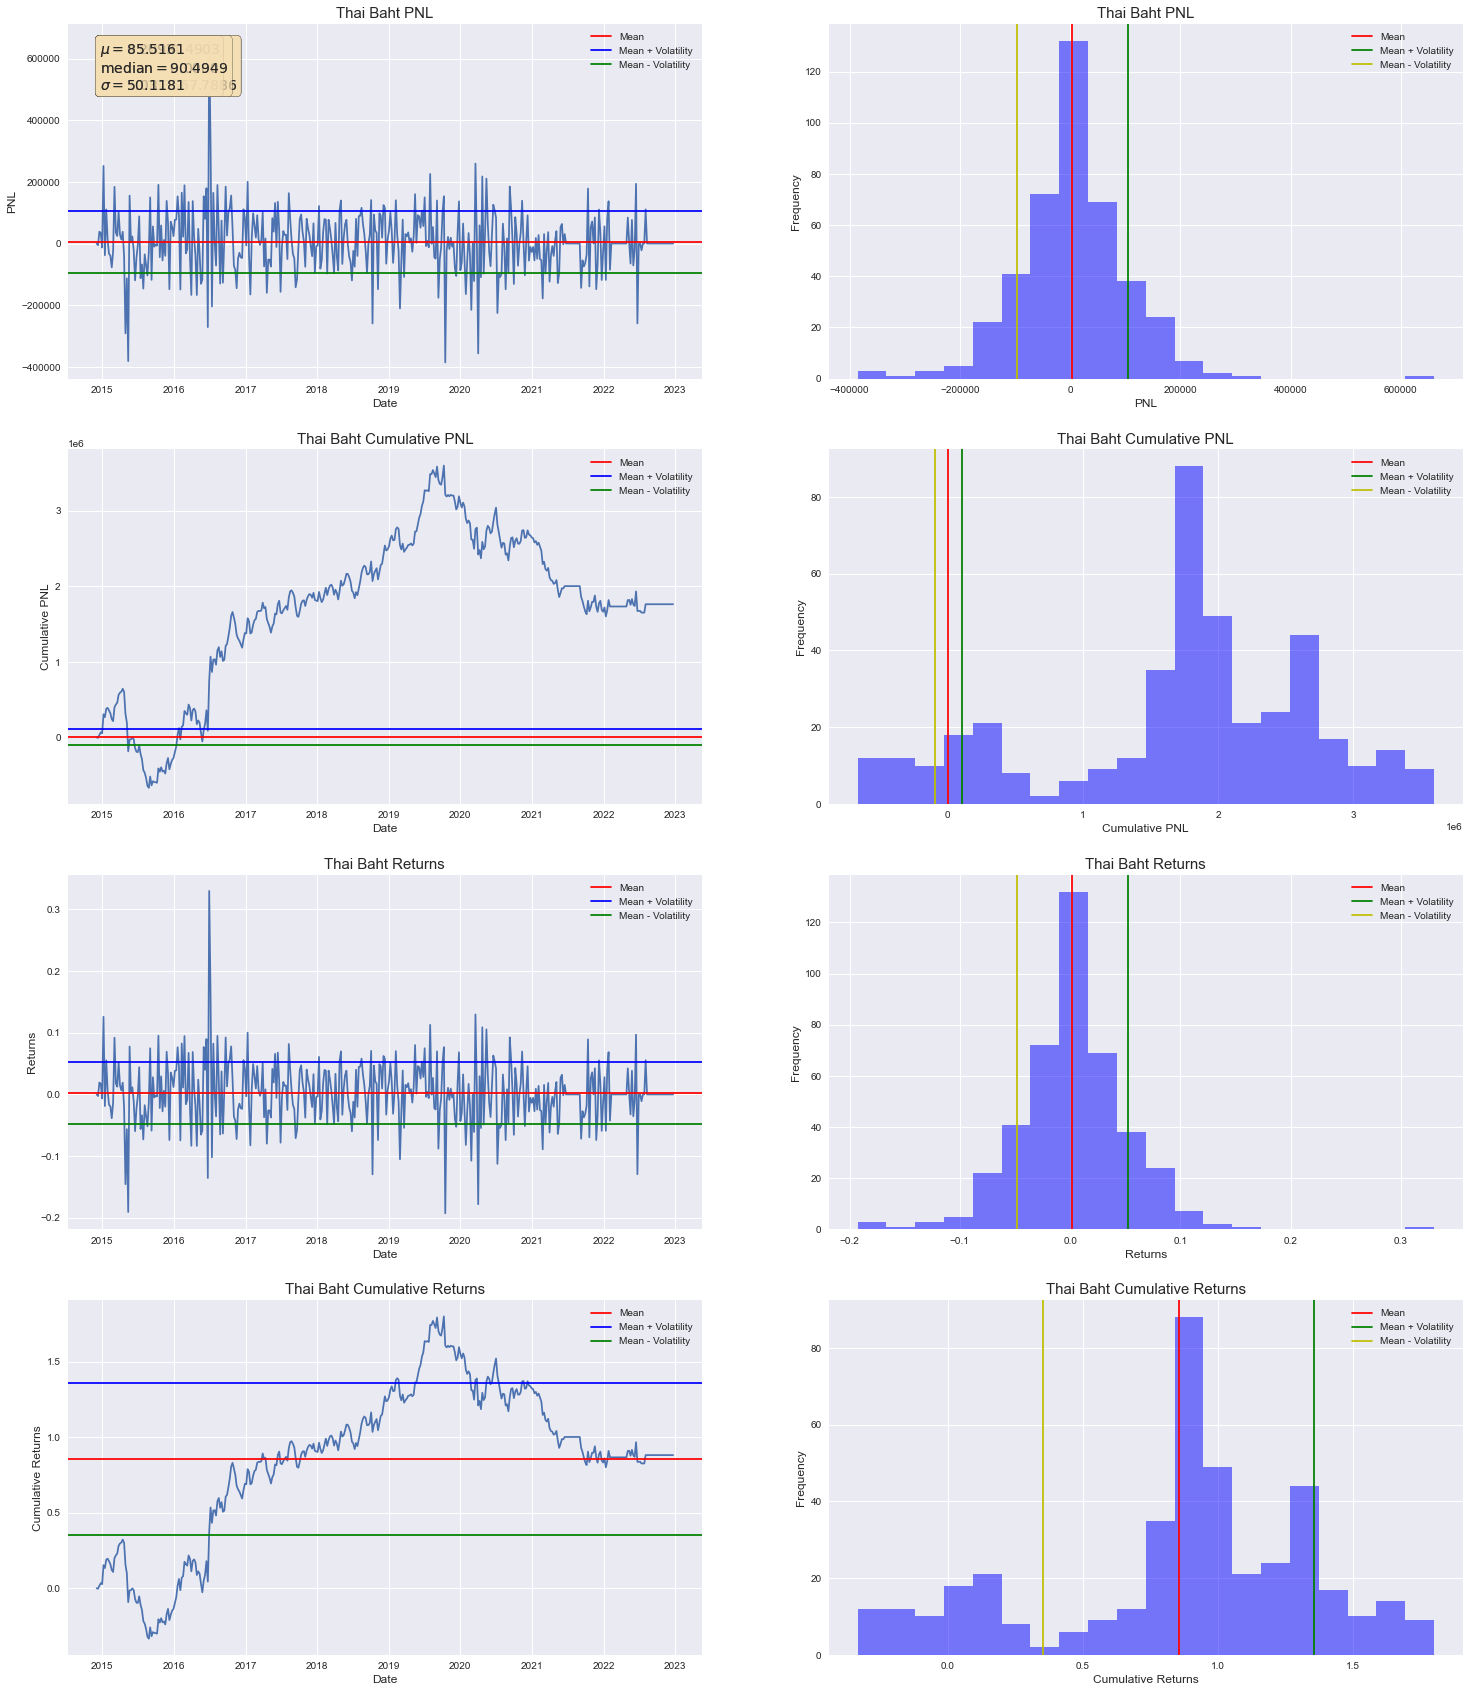

In [1001]:
tha_plot_1 = carry_strategy_analysis_2(THA_final, 'Thai Baht', THA, GBP)

In [1081]:
THA_performance = performance_summary(THA_final[['borrowing_entry_positions', 'borrowing_exit_positions', 'Bond_enter_price', 'Bond_exit_price', 'lending_entry_positions', 'lending_exit_positions', 'pnl', 'returns', 'cumpnl', 'cumreturns']])
THA_performance

,Mean,Median,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),1% quantile,2% quantile,10% quantile,Min,Max,max_drawdown
borrowing_entry_positions,6.307169e+07,6.003056e+06,6.824161e+06,9.242,-2.194,3.140,0.000,0.000,0.000,0.000,0.000,0.000,6.751208e+06,0.000
borrowing_exit_positions,1.057421e+08,9.986485e+06,1.122483e+07,9.420,-2.361,3.600,0.000,0.000,0.000,0.000,0.000,0.000,1.035874e+07,0.000
Bond_enter_price,1.200600e+01,1.001000e+00,1.000000e-03,9665.844,0.487,-0.458,1.000,1.000,1.000,1.000,1.000,1.000,1.002000e+00,0.000
Bond_exit_price,1.201200e+01,1.001000e+00,2.000000e-03,6925.468,0.259,-0.807,1.000,1.000,1.000,1.000,1.000,1.000,1.002000e+00,0.000
lending_entry_positions,3.483830e+09,3.256100e+08,3.741848e+08,9.310,-2.253,3.317,0.000,0.000,0.000,0.000,0.000,0.000,3.686000e+08,0.000
lending_exit_positions,1.057923e+08,9.999262e+06,1.122721e+07,9.423,-2.363,3.606,0.000,0.000,0.000,0.000,0.000,0.000,1.030781e+07,0.000
pnl,5.022534e+04,0.000000e+00,3.486122e+05,0.144,0.283,5.180,-148057.445,-219923.479,-268763.180,-213287.843,-115762.634,-385663.306,6.600612e+05,-inf
returns,2.500000e-02,0.000000e+00,1.740000e-01,0.144,0.283,5.180,-0.074,-0.110,-0.134,-0.107,-0.058,-0.193,3.300000e-01,-0.684
cumpnl,2.052386e+07,1.809898e+06,3.472286e+06,5.911,-0.648,-0.207,-286817.279,-481184.710,-592890.277,-502126.446,54184.200,-667263.048,3.597431e+06,-inf
cumreturns,1.026200e+01,9.050000e-01,1.736000e+00,5.911,-0.648,-0.207,-0.143,-0.241,-0.296,-0.251,0.027,-0.334,1.799000e+00,-0.999


#### Observations

1. Mean of cumulative returns is high around 10%.
2. Skewness of returns is positive which is desirable, means more returns which are higher than the mean, which can be inferrred from returns and cumulative returns graphs as well.
3. Positive excess kurtosis of returns says fatter tail compared to normal distribution, which can be observed from Return and cumulative Return distribution graph as well. 
In general, we can also infer this as having associated with greater risk of investing in Phillipine Peso currency compared to that of stable GBP currency. If there is a significant change in prices, then things will go wrong and can get high losses. 
4. Maximum drawdown of cumulative returns is of almost -0.99 which means max loss we have inccured is about 99% wrt maximum value obtained. 
5. Maximum gain occured around mid of 2016 and max loss around end of 2019. 
5. The tail of the histogram for returns and cumulative returns seems to be heavy bcz we are borrowing in low yielding currency GBP and investing in high yeilding currency Phillipine Peso.  
6. Annualized Sharp ratio of cumulative returns is around 5.9


# Mean of Cumulative Returns across 4 currencies 

In [1149]:
ret_mean  = pd.DataFrame({'VNM':VNM_performance.loc['cumreturns','Mean'], 'PAK':PAK_performance.loc['cumreturns','Mean'], 'THA':THA_performance.loc['cumreturns','Mean'], 'PHL':PHL_performance.loc['cumreturns','Mean']}, index=['Means Across Returns'])
ret_mean

,VNM,PAK,THA,PHL
Means Across Returns,14.499,14.607,10.262,10.087


In [1147]:
ret_mean.loc['Index','VNM'] = 0
ret_mean.loc['Index','PAK'] = 1
ret_mean.loc['Index','THA'] = 2
ret_mean.loc['Index','PHL'] = 3


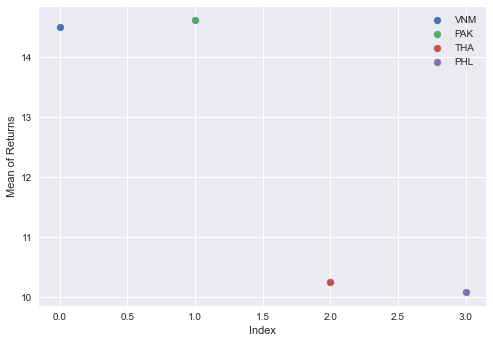

In [1148]:
plt.scatter(ret_mean.loc['Index','VNM'],ret_mean.loc['Means Across Returns','VNM'], label = 'VNM')
plt.scatter(ret_mean.loc['Index','PAK'],ret_mean.loc['Means Across Returns','PAK'], label = 'PAK')
plt.scatter(ret_mean.loc['Index','THA'],ret_mean.loc['Means Across Returns','THA'], label = 'THA')
plt.scatter(ret_mean.loc['Index','PHL'],ret_mean.loc['Means Across Returns','PHL'], label = 'PHL')
plt.xlabel('Index')
plt.ylabel('Mean of Returns')
plt.legend()

#### Observations

1. The cumulative Mean returns for PAK is highest and for PHL is lowest.
2. PAK has higher interest rate compared to other currencies so there is a high possibility to get higher returns investing in PAK as we can exploit the interest rate spread of PAK and GBP. 
3. Similarly, THA and PHL have similar interest rate yield and higher than PAK, so after PAK we get good returns investing in them.  


# Spread between Lending and Borrowing currencies

In [1136]:
def plot_spread(lending_currency, borrowing_currency, title='Spread Chart', lending_label='Lending Currency', borrowing_label='Borrowing Currency'):
    common_index = lending_currency.index.intersection(borrowing_currency.index)
    lending_currency = lending_currency.loc[common_index]
    borrowing_currency = borrowing_currency.loc[common_index]
    spread = lending_currency[5] - borrowing_currency[5]
    return spread


In [1139]:
VNM_GBP_spread = plot_spread(VNM, GBP, 'VNM vs GBP Spread', 'VNM', 'GBP')
PAK_GBP_spread = plot_spread(PAK, GBP, 'PAK vs GBP Spread', 'PAK', 'GBP')
PHL_GBP_spread = plot_spread(PHL, GBP, 'PHL vs GBP Spread', 'PHL', 'GBP')
THA_GBP_spread = plot_spread(THA, GBP, 'THA vs GBP Spread', 'THA', 'GBP')


<AxesSubplot:xlabel='Date'>

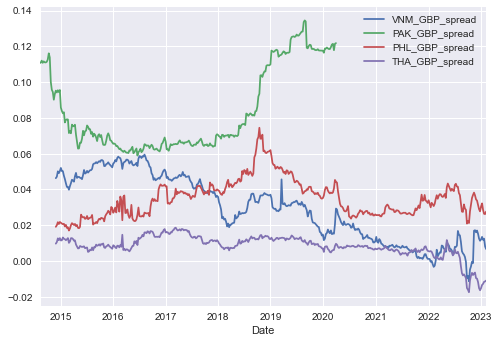

In [1142]:
spread_plot = pd.DataFrame({'VNM_GBP_spread':VNM_GBP_spread, 'PAK_GBP_spread':PAK_GBP_spread, 'PHL_GBP_spread':PHL_GBP_spread, 'THA_GBP_spread':THA_GBP_spread})
spread_plot.plot()    
    

#### Observations

1. PAK GBP yield spread is the highest and THA GBP yield curve spread is the lowest.
2. We can also infer this credit Ratings of these currencies where THA has highest credit rating among them and PAK has lowest among them.

# Regressing Returns with exchange rate ratio and interest rate separately

In [1010]:
def reg_summary(y,fx_lending_rate,fx_borrowing_rate, X2, col1, col2):

    common_index = y.index.intersection(fx_lending_rate.index).intersection(X2.index)
    y = y.loc[common_index]
    fx_lending_rate = fx_lending_rate.loc[common_index]
    fx_borrowing_rate = fx_borrowing_rate.loc[common_index]
    X1 =  fx_lending_rate/fx_borrowing_rate
    X1 = X1.loc[common_index]
    X2 = X2.loc[common_index]

    # Fit first regression model using X1
    model1 = sm.OLS(y, sm.add_constant(X1), missing='drop').fit()
    reg_summary1 = model1.params.to_frame(col1)
    reg_summary1 = reg_summary1.rename(index={'const': 'alpha'})
    reg_summary1.loc[r'$R^{2}$'] = model1.rsquared

    # Fit second regression model using X2
    model2 = sm.OLS(y, sm.add_constant(X2), missing='drop').fit()
    reg_summary2 = model2.params.to_frame(col2)
    reg_summary2 = reg_summary2.rename(index={'const': 'alpha'})
    reg_summary2.loc[r'$R^{2}$'] = model2.rsquared

    result = pd.concat([round(reg_summary1, 4).T,round(reg_summary2, 4).T ], axis=0)
    return result

In [1011]:
VNM_regression= reg_summary(VNM_final['returns'],VNDUSD['RATE'], GBPUSD['RATE'],GBP_OIS['0.08Y'], 'exchange_rate_summary', 'interest_rate_summary')
VNM_regression

,alpha,RATE,$R^{2}$,0.08Y
exchange_rate_summary,0.0963,-0.0,0.0103,NaN
interest_rate_summary,0.0024,NaN,0.0023,0.4556


In [1012]:
PAK_regression= reg_summary(PAK_final['returns'],PKRUSD['RATE'], GBPUSD['RATE'],GBP_OIS['0.08Y'], 'exchange_rate_summary', 'interest_rate_summary')
PAK_regression

,alpha,RATE,$R^{2}$,0.08Y
exchange_rate_summary,0.0567,-0.0003,0.0100,NaN
interest_rate_summary,0.0087,NaN,0.0006,-0.9983


In [1013]:
PHL_regression= reg_summary(PHL_final['returns'],PHPUSD['RATE'], GBPUSD['RATE'],GBP_OIS['0.08Y'], 'exchange_rate_summary', 'interest_rate_summary')
PHL_regression

,alpha,RATE,$R^{2}$,0.08Y
exchange_rate_summary,0.1879,-0.0028,0.0206,NaN
interest_rate_summary,0.0023,NaN,0.0007,0.2859


In [1014]:
THA_regression= reg_summary(THA_final['returns'],THBUSD['RATE'], GBPUSD['RATE'],GBP_OIS['0.08Y'], 'exchange_rate_summary', 'interest_rate_summary')
THA_regression

,alpha,RATE,$R^{2}$,0.08Y
exchange_rate_summary,0.0237,-0.0005,0.0017,NaN
interest_rate_summary,0.0015,NaN,0.0002,0.1172


#### Observations

1. We can observe that in most of them, returns are positively coorrelated to interest rate spreads and negatively correlated to currency exchange rat, which means the change in returns is mostly driven by interest rate changes. 
2. Below, we will try to analyze in what proportion currency/interest rate is effecting returns. 

# Regressing Returns with exchange rate ratio and interest rate combined to understand the cumulative effect

In [1047]:
def reg_summary_combined(y,fx_lending_rate,fx_borrowing_rate, X2):
    
    common_index = y.index.intersection(fx_lending_rate.index).intersection(fx_borrowing_rate.index)
    y = y.loc[common_index]
    fx_lending_rate = fx_lending_rate.loc[common_index]
    fx_borrowing_rate = fx_borrowing_rate.loc[common_index]
    ratio =  fx_lending_rate/fx_borrowing_rate
    ratio = ratio.loc[common_index]
    X2 = X2.loc[common_index]
    X = pd.concat([ratio, X2], axis=1)
    
    model1 = sm.OLS(y, sm.add_constant(X), missing='drop').fit()
    reg_summary = model1.params.to_frame('Regression Summary')
    reg_summary = reg_summary.rename(index={'const': 'alpha'})
    reg_summary.loc[r'$R^{2}$'] = model1.rsquared
    return round(reg_summary,4).T

In [1049]:
VNM_regression_combined = reg_summary_combined(VNM_final['returns'], VNDUSD['RATE'], GBPUSD['RATE'], GBP_OIS['0.08Y'])
VNM_regression_combined

,alpha,RATE,0.08Y,$R^{2}$
Regression Summary,0.09,-0.0,0.1895,0.0107


In [1050]:
PAK_regression_combined = reg_summary_combined(PAK_final['returns'], PKRUSD['RATE'], GBPUSD['RATE'], GBP_OIS['0.08Y'])
PAK_regression_combined

,alpha,RATE,0.08Y,$R^{2}$
Regression Summary,0.0939,-0.0007,6.1691,0.0186


In [1053]:
PHL_regression_combined = reg_summary_combined(PHL_final['returns'], PHPUSD['RATE'], GBPUSD['RATE'], GBP_OIS['0.08Y'])
PHL_regression_combined

,alpha,RATE,0.08Y,$R^{2}$
Regression Summary,0.194,-0.0029,0.511,0.0229


In [1052]:
THA_regression_combined = reg_summary_combined(THA_final['returns'], THBUSD['RATE'], GBPUSD['RATE'], GBP_OIS['0.08Y'])
THA_regression_combined

,alpha,RATE,0.08Y,$R^{2}$
Regression Summary,0.0228,-0.0005,0.0841,0.0018


#### Observations

1. We can observe that in case of all currencies, returns are more dependent and driven by interest rate spreads than the currency exchange which is inline with the underlying principle of this strategy. 

# Economic View of factors affecting the currencies

### Vietnamese Dong:
- GDP Growth: From 2015 to 2019, Vietnam's GDP grew at an average rate of around 6.7% per year. However, due to the COVID-19 pandemic, Vietnam's GDP growth rate slowed down to around 2.9% in 2020. Thus we coould see steep depreciation of the spot curve mainly from 2019.<br><br>

- Debt: Debt along the years also significantly incraesed which has lead to negative impact on the currency.<br><br>

- Credit Rating: Vietnam's credit rating has improved over the past few years, with Moody's upgrading Vietnam's rating to Ba3 in 2020, citing the country's strong economic growth, stable inflation, and rising foreign exchange reserves. However, Moody's also warned that Vietnam's high public debt and external financing needs pose risks to its creditworthiness, particularly in the event of a sharp rise in global interest rates or a sudden slowdown in economic growth.<br><br>

- Inflation: Inflation gradually increased from 0.63% in 2015 to 2.8% in 2021 thereby having negative impact on currency. <br><br>

    

### Pakistani Rupee:
- GDP Growth: From 2015 to 2019, Pakistan's GDP grew at an average rate of around 4.7% per year. However, the country's growth rate slowed down to -0.4% in 2020 due to the impact of the COVID-19 pandemic. This slowdown in economic growth has put pressure on the Pakistani rupee.<br><br>

- Debt: along the years also significantly increased which has lead to negative impact on the currency.<br><br>

- Credit Rating: Pakistan's credit rating has been downgraded in recent years, with Moody's and S&P both rating the country's sovereign debt as junk. This has made it more difficult and expensive for Pakistan to borrow money on international markets.<br><br>

- Inflation: Pakistan has been experiencing high levels of inflation in recent years, with the inflation rate reaching a 9-year high of 14.6% in January 2020. Inflation has since eased somewhat but remains high, with the inflation rate at around 9% as of December 2021. This high inflation has put pressure on the Pakistani rupee. <br><br>

    

### Thai Baht currency:
- GDP Growth: GDP Growth: From 2015 to 2019, Thailand's GDP grew at an average rate of around 3.6% per year. However, the country's growth rate slowed down to -6.1% in 2020 due to the impact of the COVID-19 pandemic. Nevertheless, the Thai economy has shown signs of recovery in 2021, with the government implementing measures to support economic growth. We can observe there is a gradual increase in spot rates.<br><br>

- Debt: Thailand's public debt level is relatively low compared to many other emerging market countries, which has helped to support the Thai Baht. This had positive impact on currency.<br><br>

- Credit Rating: Thailand has a relatively strong credit rating, with Moody's and S&P both rating the country's sovereign debt as investment grade. This has made it easier and less expensive for Thailand to borrow money on international markets.<br><br>

- Inflation: Thailand has experienced relatively low and stable inflation in recent years, with the inflation rate remaining below the Bank of Thailand's target range of 1-3% for most of the past few years. As of December 2021, the inflation rate was at 2.4%. 

    

### Philippine Peso currency:
- GDP Growth: From 2015 to 2019, the Philippines' GDP grew at an average rate of around 6.4% per year, making it one of the fastest-growing economies in Asia. However, the country's growth rate slowed down to -9.5% in 2020 due to the impact of the COVID-19 pandemic. The government has implemented measures to support economic recovery in 2021, and the economy is expected to rebound. Thus we see a dip in spot rate dueing covid and then recovered from 2019.<br><br>

- Debt: The Philippines has a relatively high level of public debt, which has been a key factor influencing the value of the Philippine Peso. This had a negative impat on currency.<br><br>

- Credit Rating: The Philippines has a relatively strong credit rating, with Moody's and S&P both rating the country's sovereign debt as investment grade. However, there are concerns that the country's high level of public debt may pose risks to its creditworthiness in the future.<br><br>

- Inflation: The Philippines has experienced relatively low and stable inflation in recent years, with the inflation rate remaining within the central bank's target range of 2-4% for most of the past few years. As of December 2021, the inflation rate was at 4.2%. 

    

# Conclusion

- On an average, we observe a good mean of cumulative returns for all the 4 currencies using this strategy ranging from 10% to 14%.<br><br>
- We observe higher returns in case of PAK as it has higher interest rate compared to other currencies so there is a high possibility to get higher returns investing in PAK as we can exploit the interest rate spread of PAK and GBP.<br><br>

- We see that all the cuurencies were impacted during the covid period.<br><br>

- Overall, the FX carry trade strategy can be a potentially profitable investment strategy, especially in times of low interest rates and stable market conditions. However, it is important to note that the FX carry trade strategy carries significant risks, including currency fluctuations, market volatility, and geopolitical events.<br><br>

- Most of the time we will keep making money since we are borrowing in lower rates and investing in higher rates. Unless things go really bad, and price dips to half the price, then there will be a big heavy tail loss. 



